In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# read dataset
years = pd.read_csv("Gold_Yearly .csv")
months = pd.read_csv("Gold_Monthly.csv")

In [3]:
years.head()

,Year,Average\nClosing Price,Year Open,Year High,Year Low,Year Close,Annual\n% Change
0,1969,41.10,41.80,43.75,35.00,35.21,-0.1607
1,1970,35.96,35.13,39.19,34.78,37.38,0.0616
2,1971,40.80,37.33,43.90,37.33,43.50,0.1637
3,1972,58.17,43.73,70.00,43.73,64.70,0.4874
4,1973,97.12,64.99,127.00,64.10,112.25,0.7349


In [4]:
months.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,Feb 79,271.6,271.6,271.6,271.6,-,0.0727
1,Mar 79,256.6,256.6,256.6,256.6,-,-0.0552
2,Apr 79,262.4,262.4,262.4,262.4,-,0.0226
3,May 79,290.7,290.7,290.7,290.7,-,0.1079
4,Jun 79,293.5,293.5,293.5,293.5,-,0.0096


------------------

In [5]:
years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   53 non-null     int64  
 1   Average
Closing Price  53 non-null     float64
 2   Year Open              53 non-null     float64
 3   Year High              53 non-null     float64
 4   Year Low               53 non-null     float64
 5   Year Close             53 non-null     float64
 6   Annual
% Change        53 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 3.0 KB


In [6]:
months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      515 non-null    object 
 1   Price     515 non-null    float64
 2   Open      515 non-null    float64
 3   High      515 non-null    float64
 4   Low       515 non-null    float64
 5   Vol.      515 non-null    object 
 6   Change %  515 non-null    float64
dtypes: float64(5), object(2)
memory usage: 28.3+ KB


In [7]:
years.describe()

,Year,Average\nClosing Price,Year Open,Year High,Year Low,Year Close,Annual\n% Change
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,1995.000000,591.265094,575.181698,677.918679,520.668679,604.341321,0.100798
std,15.443445,497.289713,483.980198,560.304150,440.807918,500.820725,0.272544
min,1969.000000,35.960000,35.130000,39.190000,34.780000,35.210000,-0.321500
25%,1982.000000,294.120000,282.050000,326.250000,263.800000,289.200000,-0.044300
50%,1995.000000,383.730000,395.000000,421.400000,358.100000,391.000000,0.056800
75%,2008.000000,872.370000,840.750000,1023.500000,692.500000,865.000000,0.217400
max,2021.000000,1799.100000,1946.600000,2058.400000,1678.000000,1895.100000,1.334100


In [8]:
months.describe()

,Price,Open,High,Low,Change %
count,515.000000,515.000000,515.000000,515.000000,515.000000
mean,715.115437,713.269417,736.067184,693.334563,0.005166
std,495.972666,495.524157,508.665490,482.017132,0.052965
min,255.800000,255.500000,256.600000,252.500000,-0.214900
25%,355.500000,353.850000,364.650000,344.100000,-0.026800
50%,415.900000,416.400000,430.500000,403.900000,0.000300
75%,1211.350000,1216.950000,1248.200000,1191.800000,0.031750
max,2026.900000,2098.500000,2121.700000,1958.300000,0.277200


In [ ]:
# There is no null data

In [ ]:
# Data cleaning 

In [9]:
# un useful cloumns 
months.drop('Vol.',axis =1,inplace=True )

In [10]:
# validate columns types
for e in months.Date:
    pair = e.split(" ")
    if int(pair[1]) <=21 :
        pair[1]="20"+pair[1]
    elif int(pair[1])<= 99 and int(pair[1])>=79:
        pair[1]="19"+pair[1]
    new_e = " ".join(pair)
    months['Date']=months['Date'].replace(e,new_e)
        
months['Date']=pd.to_datetime(months['Date'])             

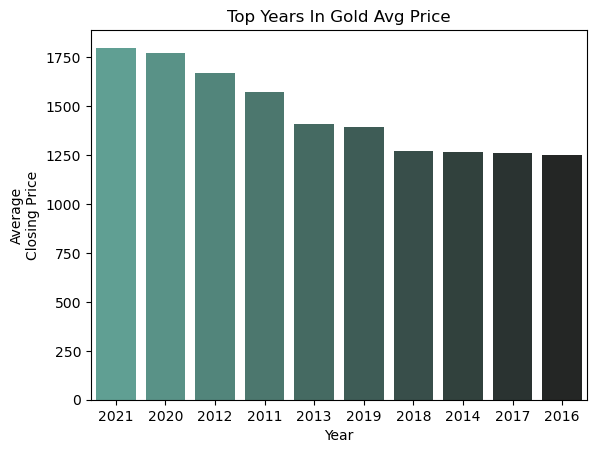

In [17]:
top_years=years.groupby('Year').mean().sort_values('Average\nClosing Price',ascending=False).head(10)
top_years=top_years[['Average\nClosing Price']].round(2)
top_years.reset_index(inplace=True)
top_years['Year']=top_years['Year'].astype("str")
top_years

sns.barplot(x='Year',y='Average\nClosing Price',data=top_years,palette='dark:#5A9_r')
plt.title("Top Years In Gold Avg Price")
plt.show()

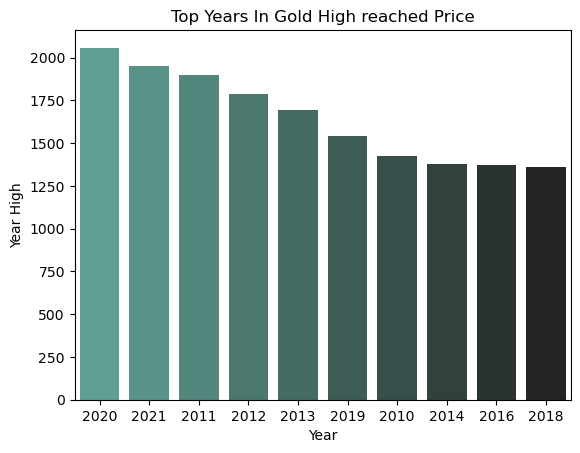

In [18]:

top_years=years.groupby('Year').mean().sort_values('Year High',ascending=False).head(10)
top_years=top_years[['Year High']].round(2)
top_years.reset_index(inplace=True)
top_years['Year']=top_years['Year'].astype("str")
top_years

sns.barplot(x='Year',y='Year High',data=top_years,palette='dark:#5A9_r')
plt.title("Top Years In Gold High reached Price")
plt.show()

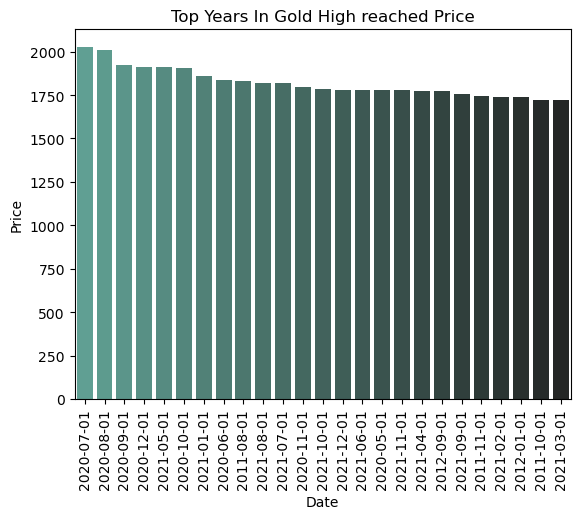

In [19]:


top_months=months.groupby('Date').mean().sort_values('Price',ascending=False).head(25)
top_months=top_months[['Price']].round(2)
top_months.reset_index(inplace=True)
top_months['Date']=top_months['Date'].astype("str")
top_months

sns.barplot(x='Date',y='Price',data=top_months,palette='dark:#5A9_r')
plt.xticks(rotation='vertical')
plt.title("Top Years In Gold High reached Price")
plt.show()

--------------------
## data correlatoin

<AxesSubplot:>

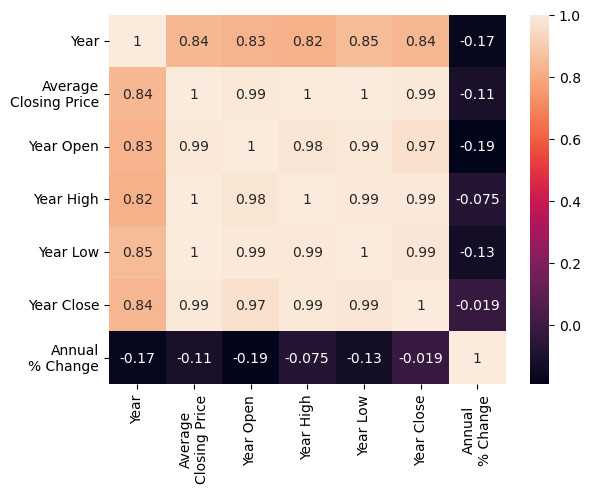

In [20]:
sns.heatmap(years.corr(),annot=True)

<AxesSubplot:>

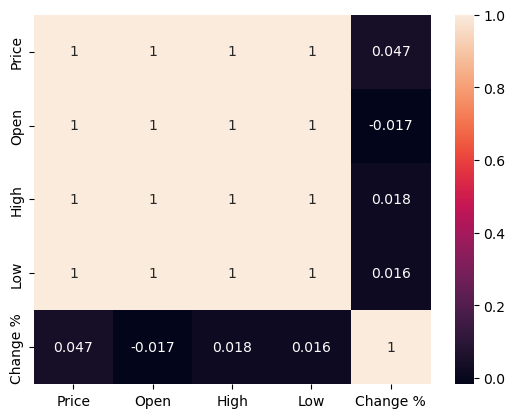

In [21]:
sns.heatmap(months.corr(),annot=True)